In [12]:
import numpy as np
import pandas as pd
import matplotlib . pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn . svm import SVC
from sklearn . model_selection import train_test_split
from sklearn . preprocessing import StandardScaler
from sklearn . metrics import accuracy_score , classification_report
from mlxtend.plotting import plot_decision_regions

In [3]:
# Step 1: Load Iris dataset
iris = datasets.load_iris ()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

In [4]:
# Step 2: Use only 2 features ( petal length & petal width ) for 2D visualization
X_2d = X [: , [2 , 3]] # petal length and width
X_train, X_test, y_train, y_test = train_test_split (X_2d, y, test_size =0.3, random_state =42, stratify = y)

In [8]:
# Step 3: Standardize the features
scaler = StandardScaler ()
X_train_scaled = scaler.fit_transform (X_train)
X_test_scaled = scaler.transform (X_test)


- - - SVM with LINEAR kernel ---
 Accuracy : 0.91
 Classification Report :
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



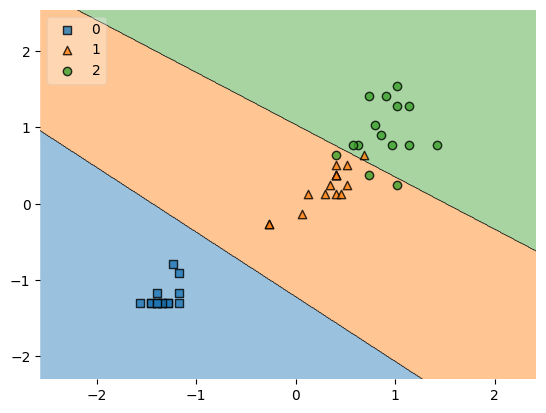


- - - SVM with POLY kernel ---
 Accuracy : 0.91
 Classification Report :
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.79      1.00      0.88        15
   virginica       1.00      0.73      0.85        15

    accuracy                           0.91        45
   macro avg       0.93      0.91      0.91        45
weighted avg       0.93      0.91      0.91        45



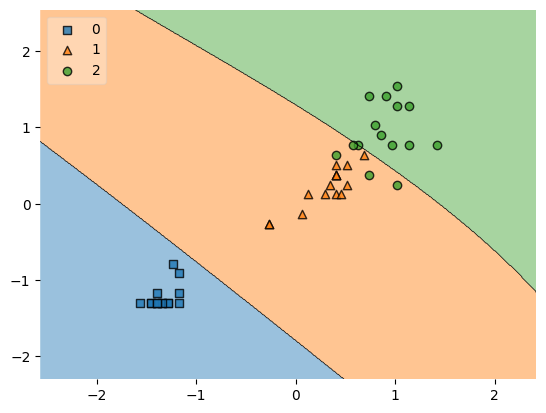


- - - SVM with RBF kernel ---
 Accuracy : 0.91
 Classification Report :
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



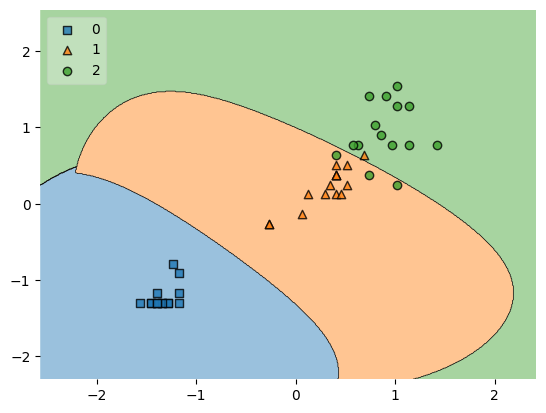

In [21]:
# Step 4: Train SVM with different kernels
kernels = ['linear', 'poly', 'rbf']
models = {}
for kernel in kernels :
    if kernel == 'poly':
        clf = SVC (kernel ='poly', degree =3 , gamma ='auto')
    else :
        clf = SVC (kernel = kernel , gamma ='auto')
        
    clf.fit ( X_train_scaled , y_train )
    models[kernel] = clf
    y_pred = clf.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print ( f"\n- - - SVM with {kernel.upper()} kernel ---")
    print ( f" Accuracy : {acc :.2f}")
    print (" Classification Report :")
    print ( classification_report(y_test, y_pred, target_names=target_names))

    plot_decision_regions(X_test_scaled, y_test, clf=clf, legend=2)
    plt.show()